In [1]:
import pImpactR as impact
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from copy import deepcopy as copy
from scipy.optimize import minimize
import shutil 
import pickle
rectangular_ = 1
elliptic_ = 2

In [2]:
NL_t = 0.4
emitGeomRMS = 3.3e-6
npt = 50000
print('npt=',npt)
nturn = 2000

npt= 50000


In [3]:
NL_L = 1.8
NL_c = 0.01
NL_nu = 0.3

In [4]:
full_data = pickle.load(open('pLossData_iota_v8_4_variousSextSettings.pickle','rb'))
# deco = 'iota_v8_4_SextOff_NLon_thermal'
# print(len(full_data[deco]['pLost'])/50000)
# deco = 'iota_v8_4_SextOn_NLon_thermal'
# print(len(full_data[deco]['pLost'])/50000)

# read Aperture

In [5]:
aperture = np.loadtxt('pipeinfo.in')

In [6]:
np.min(aperture[:,1]),np.min(aperture[:,2])

(0.004, 0.0055000000000000005)

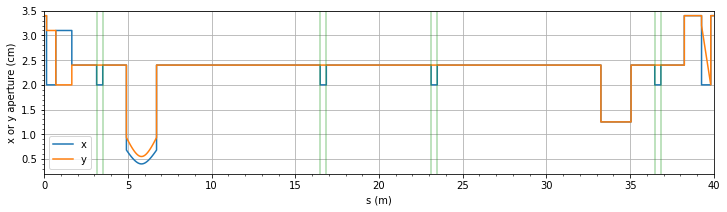

In [7]:
plt.figure(figsize=(12,3))
plt.plot(aperture[:,0],aperture[:,1]*100)
plt.plot(aperture[:,0],aperture[:,2]*100)
plt.plot(aperture[:,0],(aperture[:,3]-1)*10,alpha=0.4)
plt.grid()
plt.ylim((0.2,3.5))
plt.xlim((0.0, 40))
plt.minorticks_on()
plt.legend(('x','y'))
plt.xlabel('s (m)')
plt.ylabel('x or y aperture (cm)');

In [8]:
ap0_x,ap0_y = 0.00680513, 0.00935705
ap1_x,ap1_y = 4.00000000e-03, 5.50000000e-03
ang = np.arange(0.0,2*np.pi,2*np.pi/1024)
c = np.cos(ang)
s = np.sin(ang)

In [9]:
L=aperture[-1,0]
L

39.968229720000004

# Plot

### Thermal beam

In [10]:
deco = 'iota_v8_4_SextOff_NLon_thermal'
data = full_data[deco]

In [11]:
data['stat']['emitx'][0],data['stat']['emity'][0],data['stat']['Hmean'][0],data['stat']['Imean'][0]

(1.9322492e-07, 4.077177e-07, 0.0610078628311, 0.070051085357)

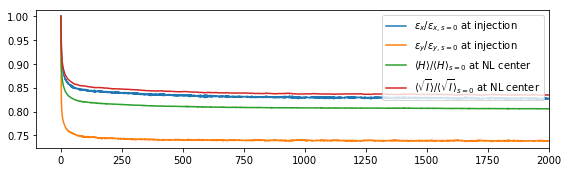

In [12]:
nskip = int(len(data['stat']['s'])/2000)

plt.figure(figsize=(8,2.5))
plt.plot(data['stat']['emitx'][::nskip]/data['stat']['emitx'][0])
plt.plot(data['stat']['emity'][::nskip]/data['stat']['emity'][0])
plt.plot(data['stat']['Hmean']/data['stat']['Hmean'][0])
plt.plot(data['stat']['Imean']/data['stat']['Imean'][0])
plt.legend([r'$\epsilon_x/\epsilon_{x,s=0}$ at injection',
            r'$\epsilon_y/\epsilon_{y,s=0}$ at injection',
            r'$\langle H \rangle/\langle H \rangle_{s=0}$ at NL center',
            r'$\langle \sqrt{I} \rangle/\langle \sqrt{I} \rangle_{s=0}$ at NL center'],
           loc=1)

plt.xlim(-100,2001)
plt.tight_layout()
plt.savefig(deco+'.stat.png',dpi=180)
plt.savefig(deco+'.stat.eps',dpi=180)

/home/kilean/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


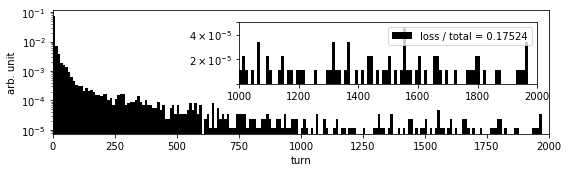

In [13]:
nlost = len(data['pLost'][:,0])
# plt.hist(data['pLost'][:,0]/L,bins=1000,range=(0,10000),color='b',alpha=0.5)

plt.figure(figsize=(8,2.5))
ax = plt.subplot(1,1,1)
plt.hist(data['pLost'][:,0]/L,bins=int(0.1*nturn),range=(0,nturn),color='k',density=True)
plt.xlim([0,2000])
# plt.ylim([0,100])
plt.yscale('log')
plt.xlabel('turn');
plt.ylabel('arb. unit');

inset_axes2 = inset_axes(ax,
                         width="60%", # width = 30% of parent_bbox
                         height="50%", # height : 1 inch
                         loc=1,
                         borderpad=1.2)
inset_axes2.hist(data['pLost'][:,0]/L,bins=int(0.1*nturn),range=(0,nturn),color='k',density=True)
# inset_axes2.grid()
inset_axes2.set_xlim([int(0.5*nturn),nturn])
inset_axes2.set_ylim([0,5e-6])
inset_axes2.set_yticks([0,2e-5,4e-5,5e-5])
inset_axes2.set_yticklabels(['',r'$2\times10^{-5}$',r'$4\times10^{-5}$'])
inset_axes2.legend(['loss / total = '+str(nlost/npt)])
# inset_axes2.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
# mark_inset(ax, inset_axes2, loc1=2, loc2=4)#, fc="none", ec="0.5")

plt.tight_layout()
plt.savefig(deco+'.lostHist.png',dpi=180)
plt.savefig(deco+'.lostHist.eps',dpi=180)

In [14]:
data.keys()

dict_keys(['Twiss0', 'Twiss1', 'pData0', 'pData1', 'pLost', 'stat'])

In [43]:
data['pLost'][:10,-1]

array([6., 6., 6., 6., 6., 6., 6., 6., 6., 6.])

In [38]:
index_Esort = np.argsort(data['pData1'][:,5])
pDataIndex = [index_Esort[int(0.2*i*npt):int(0.2*(i+1)*npt)] for i in range(5)]

In [39]:
pLostIndex = [np.in1d(data['pLost'][:,-1],pDataIndex[i]) for i in range(5)]
pLostEach = [np.sum(pLostIndex[i]) for i in range(5)]
print(pLostEach)

[0, 0, 0, 8762, 0]


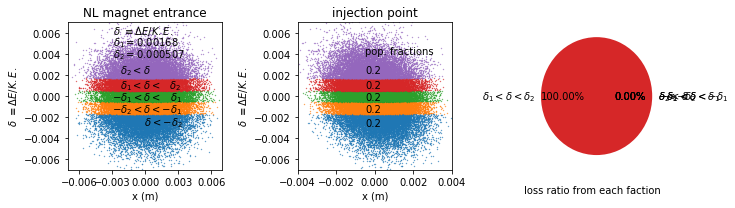

In [41]:
NPT = []
for i in range(5):
    NPT.append(len(Index[i]))
    
# plt.figure(figsize=(9.5,3))  
f, axs = plt.subplots(1,3,figsize=(9.5,3), gridspec_kw={'width_ratios': [1,1,0.9]})
# plt.subplot(1,3,1)
k=0
for i in range(5):
    axs[k].scatter(data['pData0'][pDataIndex[i],0],data['pData0'][pDataIndex[i],5]/2.5e6,s=0.1)
axs[k].set_xlim(-0.007,0.007)
axs[k].set_xticks([-0.006,-0.003,0,0.003,0.006])
axs[k].set_ylim(-0.007,0.007)
axs[k].text(-0.0029,  0.0059,r'$\delta\,\,\equiv \Delta E/K.E.$');
axs[k].text(-0.0029,  0.0048,r'$\delta_1=0.00168 $');
axs[k].text(-0.0029,  0.0037,r'$\delta_2=0.000507$');
axs[k].text(-0.003, .00219 ,r'$\,\,\,\,\,\delta_2 < \delta$');
axs[k].text(-0.003, .000752,r'$\,\,\,\,\,\delta_1 < \delta < \,\,\,\,\,\delta_2$');
axs[k].text(-0.003,-.000387,r'$-\delta_1 < \delta < \,\,\,\,\,\delta_1$');
axs[k].text(-0.003,-.001548,r'$-\delta_2 < \delta < -\delta_1$');
axs[k].text(-0.003,-.00283 ,r'$\qquad\quad\,\, \delta < -\delta_2$');
axs[k].set_xlabel('x (m)')
axs[k].set_ylabel(r'$\delta\,\,\equiv \Delta E/K.E.$')
axs[k].set_title('NL magnet entrance')

# plt.subplot(1,3,2)
k=1
for i in range(5):
    axs[k].scatter(data['pData1'][pDataIndex[i],0],data['pData1'][pDataIndex[i],5]/2.5e6,s=0.1)
    axs[k].scatter(1,1,color='C'+str(i))
axs[k].set_xlim(-0.004,0.004)
axs[k].set_ylim(-0.007,0.007)
axs[k].text(-0.0004, .004 ,'pop. fractions')
axs[k].text(-0.0004, .00217 ,NPT[4]/npt)
axs[k].text(-0.0004, .00074 ,NPT[3]/npt);
axs[k].text(-0.0004,-.000429,NPT[2]/npt);
axs[k].text(-0.0004,-.001548,NPT[1]/npt);
axs[k].text(-0.0004,-.00287 ,NPT[0]/npt);
axs[k].set_xlabel('x (m)')
axs[k].set_ylabel(r'$\delta\,\,\equiv \Delta E/K.E.$')
axs[k].set_title('injection point')

k=2
# plt.subplot(1,3,3)
labels = [r'$ \delta < -\delta_2$',
          r'$-\delta_2 < \delta < -\delta_1$',
          r'$-\delta_1 < \delta < \delta_1$',
          r'$ \delta_1 < \delta < \delta_2$',
          r'$\delta_2 < \delta$']
axs[k].pie(pLostEach, labels = labels,autopct='%1.2f%%')
axs[k].text(-1.3,-1.65,'loss ratio from each faction')

plt.tight_layout()
plt.savefig(deco+'.popDivOverE.png',dpi=180)
plt.savefig(deco+'.popDivOverE.eps',dpi=180)

In [ ]:
X20,X40

In [ ]:
plt.figure(figsize=(7.5,2.8))
bins = 20
turns= 10000
# yticks = np.array([10,100,1000,10000,100000])/2
# yticks_per_turn = yticks/npt/(turns/bins)
plt.hist([data['pLost'][pLostIndex[i],0]/L for i in range(5)],bins=20,range=(0,10000),density=True);
plt.yscale('log')
plt.xlabel('turn')
plt.ylabel('arb. unit')
plt.title('loss profile over turns by each faction (normaled to 1.0, bin=500 turns)')
plt.legend(['$\qquad\quad\,\, \delta < -\delta_2$',
            '$-\delta_2 < \delta < -\delta_1$',
            '$-\delta_1 < \delta < \,\,\,\,\,\delta_1$',
            '$\,\,\,\,\,\delta_1 < \delta < \,\,\,\,\,\delta_2$',
            '$\,\,\,\,\,\delta_2 < \delta$']);
plt.xlim(0,10000)
plt.text(5900,1.0e-3,r'$\delta\,\,\equiv \Delta E/K.E.$');
plt.text(5900,3.4e-4,r'$\delta_1=0.00168 $');
plt.text(5900,1.2e-4,r'$\delta_2=0.000507$');
# plt.yticks(yticks,yticks_per_turn);

plt.tight_layout()
plt.savefig(deco+'.pLoss.eachE.overTurns.png',dpi=180)
plt.savefig(deco+'.pLoss.eachE.overTurns.eps',dpi=180)

In [ ]:
plt.figure(figsize=(7.5,2.8))
ax = plt.subplot(1,1,1)
bins = 20
turns= 10000
yticks = np.array([1,2,4,8])
# yticks_per_turn = yticks/npt/(turns/bins)
plt.hist([np.mod(data['pLost'][pLostIndex[i],0],L) for i in range(5)],bins=20,density=True);
plt.yscale('log')
plt.xlabel('s (m)')
# plt.ylabel('arb. unit')
plt.title('partiel loss density profile over NL magnet (normaled to 1.0, bin=0.09 m)')
plt.legend(['$\qquad\quad\,\, \delta < -\delta_2$',
            '$-\delta_2 < \delta < -\delta_1$',
            '$-\delta_1 < \delta < \,\,\,\,\,\delta_1$',
            '$\,\,\,\,\,\delta_1 < \delta < \,\,\,\,\,\delta_2$',
            '$\,\,\,\,\,\delta_2 < \delta$']);
# plt.xlim(0,10000)
plt.text(6.05,2.7,r'$\delta\,\,\equiv \Delta E/K.E.$');
plt.text(6.05,2.02,r'$\delta_1=0.00168 $');
plt.text(6.05,1.5,r'$\delta_2=0.000507$');
ax.set_yticks([1,2,4])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.tight_layout()
plt.savefig(deco+'.pLoss.eachE.overNL.png',dpi=180)
plt.savefig(deco+'.pLoss.eachE.overNL.eps',dpi=180)

In [ ]:
# plt.figure(figsize=(4,3.4))
# plt.plot(ap0_x*c,ap0_y*s,alpha=0.7,c='k',lw=2)
# plt.plot(ap1_x*c,ap1_y*s,alpha=0.7,c='k',lw=2)
# plt.scatter(data['pLost'][pLostIndex[ 2],1],data['pLost'][pLostIndex[ 2],2],s=0.1,color='C2')
# plt.scatter(data['pLost'][pLostIndex[ 0],1],data['pLost'][pLostIndex[ 0],2],s=0.1,color='C0',alpha=0.4)
# plt.scatter(data['pLost'][pLostIndex[ 4],1],data['pLost'][pLostIndex[ 4],2],s=0.1,color='C4',alpha=0.8)
# plt.scatter(data['pLost'][pLostIndex[ 0],1],data['pLost'][pLostIndex[ 0],2],s=0.1,color='C0',alpha=0.4)
# plt.xticks([-0.006,-0.003,0,0.003,0.006])
# p0 = plt.scatter(1,1,color='C2')
# p1 = plt.scatter(1,1,color='C0')
# p2 = plt.scatter(1,1,color='C4')
# plt.legend([p0,p1,p2],
#            ['$-\delta_1 < \delta < \delta_1$',
#             '$\delta < -\delta_2$',
#             '$\delta > \,\,\,\,\delta_2$'],
#            loc=10);
# # plt.scatter(data['pLost'][pLostIndex[ 4],1],data['pLost'][pLostIndex[ 4],2],s=0.1,color='C2')
# plt.xlim(-0.008,0.008)
# plt.ylim(-0.012,0.012)

# plt.tight_layout()
# plt.savefig(deco+'.pLossXY.eachE.png',dpi=180)
# plt.savefig(deco+'.pLossXY.eachE.eps',dpi=180)

In [ ]:
plt.figure(figsize=(7,5))
labels = [r'$ \delta < -\delta_2$',
          r'$-\delta_2 < \delta < -\delta_1$',
          r'$-\delta_1 < \delta < \delta_1$',
          r'$ \delta_1 < \delta < \delta_2$',
          r'$\delta_2 < \delta$']
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.plot(ap0_x*c,ap0_y*s,alpha=0.7,c='k',lw=2)
    plt.plot(ap1_x*c,ap1_y*s,alpha=0.7,c='k',lw=2)
    # plt.scatter(data['pLost'][pLostIndex[ 0],1],data['pLost'][pLostIndex[ 0],2],s=0.1,color='C0')
    impact.plot.density(data['pLost'][pLostIndex[i],1],data['pLost'][pLostIndex[i],2],mksize=0.5)
    
    if i<2:
        plt.xticks([])
    else:
        plt.xticks([-0.005,0,0.005])
        plt.xlabel('x (m)')
    if i in [1,2,4]:
        plt.yticks([])
    else:
        plt.ylabel('y (m)')
        
    plt.xlim(-0.008,0.008)
    plt.ylim(-0.012,0.012)
    if i==0:
        plt.text(-0.0021,-0.001,labels[i])
    if i==1:
        plt.text(-0.00435,-0.001,labels[i],color='w')
        plt.text(-0.00445,-0.001,labels[i],color='w')
        plt.text(-0.0044,-0.001,labels[i])
    if i==2:
        plt.text(-0.0040,-0.001,labels[i])
    if i==3:
        plt.text(-0.0034,-0.001,labels[i])
    if i==4:
        plt.text(-0.0018,-0.001,labels[i])

plt.tight_layout()
plt.savefig(deco+'.pLossXY.eachE.png',dpi=180)
plt.savefig(deco+'.pLossXY.eachE.eps',dpi=180)

In [ ]:
plt.figure(figsize=(8*0.6,7*0.6))
plt.subplot(2,2,1)
impact.plot.density(data['pData1'    ][:,0],data['pData1'    ][:,2],samplePeriod=10,mksize=0.1)
plt.text(0.00259,0.008,r'T=0')
plt.xlim(-0.004,0.004)
plt.ylim(-0.01,0.01)
plt.xticks([])
plt.subplot(2,2,2)
impact.plot.density(data['pData8000' ][:,0],data['pData8000' ][:,2],samplePeriod=10,mksize=0.1)
plt.text(0.00149,0.008,r'T=8000')
plt.xlim(-0.004,0.004)
plt.ylim(-0.01,0.01)
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,3)
impact.plot.density(data['pData9000' ][:,0],data['pData9000' ][:,2],samplePeriod=10,mksize=0.1)
plt.text(0.00142,0.008,r'T=9000')
plt.xlim(-0.004,0.004)
plt.ylim(-0.01,0.01)
plt.xticks([-0.003,0,0.003])
plt.subplot(2,2,4)
impact.plot.density(data['pData10000'][:,0],data['pData10000'][:,2],samplePeriod=10,mksize=0.1)
plt.text(0.00107,0.008,r'T=10000')
plt.xlim(-0.004,0.004)
plt.ylim(-0.01,0.01)
plt.xticks([-0.003,0,0.003])
plt.yticks([])

plt.tight_layout()
plt.savefig(deco+'.atInject.xy.0,8000,9000,10000.png',dpi=180)
plt.savefig(deco+'.atInject.xy.0,8000,9000,10000.eps',dpi=180)

In [ ]:
plt.figure(figsize=(8*0.6,7*0.6))
plt.subplot(2,2,1)
impact.plot.density(data['pData1'    ][:,0],data['pData1'    ][:,1],samplePeriod=10,mksize=0.1)
plt.text(0.0026,0.006,r'T=0')
plt.xlim(-0.0041,0.0041)
plt.ylim(-0.0079,0.0079)
plt.xticks([])
plt.subplot(2,2,2)
impact.plot.density(data['pData8000' ][:,0],data['pData8000' ][:,1],samplePeriod=10,mksize=0.1)
plt.text(0.00147,0.006,r'T=8000')
plt.xlim(-0.0041,0.0041)
plt.ylim(-0.0079,0.0079)
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,3)
impact.plot.density(data['pData9000' ][:,0],data['pData9000' ][:,1],samplePeriod=10,mksize=0.1)
plt.text(0.00144,0.006,r'T=9000')
plt.xlim(-0.0041,0.0041)
plt.ylim(-0.0079,0.0079)
plt.xticks([-0.003,0,0.003])
plt.subplot(2,2,4)
impact.plot.density(data['pData10000'][:,0],data['pData10000'][:,1],samplePeriod=10,mksize=0.1)
plt.text(0.0011,0.006,r'T=10000')
plt.xlim(-0.0041,0.0041)
plt.ylim(-0.0079,0.0079)
plt.xticks([-0.003,0,0.003])
plt.yticks([])
plt.tight_layout()
plt.savefig(deco+'.atInject.xpx.0,8000,9000,10000.png',dpi=180)
plt.savefig(deco+'.atInject.xpx.0,8000,9000,10000.eps',dpi=180)

In [ ]:
plt.figure(figsize=(8*0.6,7*0.6))
plt.subplot(2,2,1)
impact.plot.density(data['pData1'    ][:,2],data['pData1'    ][:,3],samplePeriod=10,mksize=0.1)
plt.text(0.0062,0.005,r'T=0')
plt.xlim(-0.011,0.011)
plt.ylim(-0.0063,0.0063)
plt.xticks([])
plt.yticks([-0.005,0,0.005])
plt.subplot(2,2,2)
impact.plot.density(data['pData8000' ][:,2],data['pData8000' ][:,3],samplePeriod=10,mksize=0.1)
plt.text(0.00319 ,0.005,r'T=8000')
plt.xlim(-0.011,0.011)
plt.ylim(-0.0063,0.0063)
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,3)
impact.plot.density(data['pData9000' ][:,2],data['pData9000' ][:,3],samplePeriod=10,mksize=0.1)
plt.text(0.00312,0.005,r'T=9000')
plt.xlim(-0.011,0.011)
plt.ylim(-0.0063,0.0063)
plt.yticks([-0.005,0,0.005])
plt.subplot(2,2,4)
impact.plot.density(data['pData10000'][:,2],data['pData10000'][:,3],samplePeriod=10,mksize=0.1)
plt.text(0.00232,0.005,r'T=10000')
plt.xlim(-0.011,0.011)
plt.ylim(-0.0063,0.0063)
plt.yticks([])
plt.tight_layout()
plt.savefig(deco+'.atInject.ypy.0,8000,9000,10000.png',dpi=180)
plt.savefig(deco+'.atInject.ypy.0,8000,9000,10000.eps',dpi=180)

In [ ]:
data['Twiss10000']

In [ ]:
data['Twiss9000']

In [ ]:
data['Twiss8000']

In [ ]:
data['Twiss1']

In [ ]:
data['Twiss0']

### Exponential, $H_{\tau=0.4}$, $\sigma_E=2\times10^{-3}$, $order=3$

In [ ]:
# prepare_Exponential(0.4950004867198259,0.16680372901162024,emitGeomRMS,6.0,
#                     2.038761149901226, 0.46375944365876637,emitGeomRMS,6.0,
#                     2.0e-3,0.4,0.4,order=3)

In [ ]:
data = get_Exponential_data([0,10000],0.4,0.4)

In [ ]:
deco = 'plot.exponential.NL_t=0.4.beam_t=0.4.npt=1000000.nturn=10000'

In [ ]:
data['Stats']['emitx'][0],data['Stats']['emity'][0],data['Stats']['Hmean'][0],data['Stats']['Imean'][0]

In [ ]:
# plt.figure(figsize=(8,4))

# plt.subplot(2,1,1)
# plt.plot(data['Stats']['s'],data['Stats']['emitx']/data['Stats']['emitx'][0])
# plt.plot(data['Stats']['s'],data['Stats']['emity']/data['Stats']['emity'][0])
# # plt.yscale('log')
# plt.xlabel('s (m)')
# plt.xlim(-40,400000)
# plt.legend([r'$\epsilon_x/\epsilon_{x,s=0}$',r'$\epsilon_y/\epsilon_{y,s=0}$'])
# # plt.text(330000, 0.9 ,r'$\epsilon_{x,s=0}=1.923 \mu m$')
# # plt.text(330000, 0.8 ,r'$\epsilon_{y,s=0}=4.077 \mu m$')

# plt.subplot(2,1,2)
# plt.plot(data['Stats']['Hmean']/data['Stats']['Hmean'][0])
# plt.plot(data['Stats']['Imean']/data['Stats']['Imean'][0])
# # plt.yscale('log')
# plt.xlabel('turn')
# plt.xlim(-10,10000)
# plt.legend([r'$\langle H \rangle/\langle H \rangle_{s=0}$',r'$\langle \sqrt{I} \rangle/\langle \sqrt{I} \rangle_{s=0}$'])
# # plt.text(8200, 1.2 ,r'$\epsilon_{x,s=0}=1.923 \mu m$')
# # plt.text(8200, 1.1 ,r'$\epsilon_{y,s=0}=4.077 \mu m$')

# plt.tight_layout()
# plt.savefig(deco+'.stats.png',dpi=180)
# plt.savefig(deco+'.stats.eps',dpi=180)

In [ ]:
nskip = int(len(data['Stats']['s'])/10000)

plt.figure(figsize=(8,2.5))
plt.plot(data['Stats']['emitx'][::nskip]/data['Stats']['emitx'][0])
plt.plot(data['Stats']['emity'][::nskip]/data['Stats']['emity'][0])
plt.plot(data['Stats']['Hmean']/data['Stats']['Hmean'][0])
plt.plot(data['Stats']['Imean']/data['Stats']['Imean'][0])
plt.legend([r'$\epsilon_x/\epsilon_{x,s=0}$ at injection',
            r'$\epsilon_y/\epsilon_{y,s=0}$ at injection',
            r'$\langle H \rangle/\langle H \rangle_{s=0}$ at NL center',
            r'$\langle \sqrt{I} \rangle/\langle \sqrt{I} \rangle_{s=0}$ at NL center'])

plt.xlim(-100,10001)
plt.tight_layout()
plt.savefig(deco+'.stats.png',dpi=180)
plt.savefig(deco+'.stats.eps',dpi=180)

In [ ]:
nlost = len(data['pLost'][:,0])
# plt.hist(data['pLost'][:,0]/L,bins=1000,range=(0,10000),color='b',alpha=0.5)

plt.figure(figsize=(8,2.5))
ax = plt.subplot(1,1,1)
plt.hist(data['pLost'][:,0]/L,bins=1000,range=(0,10000),color='k',density=True)
plt.xlim([0,10000])
# plt.ylim([0,100])
plt.yscale('log')
plt.xlabel('turn');
plt.ylabel('arb. unit');

inset_axes2 = inset_axes(ax,
                         width="70%", # width = 30% of parent_bbox
                         height="50%", # height : 1 inch
                         loc=1,
                         borderpad=1)
inset_axes2.hist(data['pLost'][:,0]/L,bins=1000,range=(0,10000),color='k',density=True)
# inset_axes2.grid()
inset_axes2.set_xlim([5000,10000])
inset_axes2.set_ylim([0,5e-6])
inset_axes2.set_xticks([5000,6000,7000,8000,9000])
# inset_axes2.set_yticks([0,2e-6,4e-6,6e-6,8e-6],['0','2e-6','4e-6','6e-6','8e-6'])
inset_axes2.set_yticks([2e-6,4e-6])
inset_axes2.set_yticklabels([r'$2\times10^{-6}$',r'$4\times10^{-6}$'])
inset_axes2.legend(['loss / total = '+str(nlost/1e6)])
# inset_axes2.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
# mark_inset(ax, inset_axes2, loc1=2, loc2=4)#, fc="none", ec="0.5")

plt.tight_layout()
plt.savefig(deco+'.lostHist.png',dpi=180)
plt.savefig(deco+'.lostHist.eps',dpi=180)

In [ ]:
data.keys()

In [ ]:
def cdf(x):
    return 0.5*(1.0+np.erf(x/np.sqrt(2)))

def get20percent(x):
    return (cdf(x) - 0.2)**2

def get40percent(x):
    return (cdf(x) - 0.4)**2

def get60percent(x):
    return (cdf(x) - 0.6)**2

def get80percent(x):
    return (cdf(x) - 0.8)**2


X=[minimize(get20percent,-0.08).x,minimize(get40percent,-0.02).x,minimize(get60percent,0.02).x,minimize(get80percent,0.08).x]
X

In [ ]:
X20 = -2.0e-3 * X[0]
X40 = -2.0e-3 * X[1]

In [ ]:
pDataIndex = [data['pData1'][:,4]/2.5e6 < -X20,
              data['pData1'][:,4]/2.5e6 < -X40,
              data['pData1'][:,4]/2.5e6 <  X40,
              data['pData1'][:,4]/2.5e6 <  X20,]

pDataIndex = [pDataIndex[0],
              pDataIndex[1] * (-X20 <= data['pData1'][:,4]/2.5e6),
              pDataIndex[2] * (-X40 <= data['pData1'][:,4]/2.5e6),
              pDataIndex[3] * ( X40 <= data['pData1'][:,4]/2.5e6),
                                X20 <= data['pData1'][:,4]/2.5e6 ]
    
Index = [data['pData1'][pDataIndex[i],-1] for i in range(5)]

pLostIndex = [np.in1d(data['pLost'][:,-1],Index[i]) for i in range(5)]
pLostEach = [np.sum(pLostIndex[i]) for i in range(5)]

In [ ]:
X20,X40

In [ ]:
NPT = []
for i in range(5):
    NPT.append(len(Index[i]))
    
# plt.figure(figsize=(9.5,3))  
f, axs = plt.subplots(1,2,figsize=(6,3), gridspec_kw={'width_ratios': [1,0.9]})
k=0
for i in range(5):
    axs[k].scatter(data['pData1'][pDataIndex[i],0],data['pData1'][pDataIndex[i],4]/2.5e6,s=0.1)
    axs[k].scatter(1,1,color='C'+str(i))
axs[k].set_xlim(-0.004,0.004)
axs[k].set_ylim(-0.007,0.007)
axs[k].text(-0.0017, .004 ,'pop. fractions')
axs[k].text(-0.0011, .00217 ,NPT[4]/1e6)
axs[k].text(-0.0011, .00074 ,NPT[3]/1e6);
axs[k].text(-0.0011,-.000429,NPT[2]/1e6);
axs[k].text(-0.0011,-.001548,NPT[1]/1e6);
axs[k].text(-0.0011,-.00287 ,NPT[0]/1e6);
axs[k].set_xlabel('x (m)')
axs[k].set_ylabel(r'$\delta\,\,\equiv \Delta E/K.E.$')
axs[k].set_title('injection point')

k=1
# plt.subplot(1,3,3)
labels = [r'$ \delta < -\delta_2$',
          r'$-\delta_2 < \delta < -\delta_1$',
          r'$-\delta_1 < \delta < \delta_1$',
          r'$ \delta_1 < \delta < \delta_2$',
          r'$\delta_2 < \delta$']
axs[k].pie(pLostEach, labels = labels,autopct='%1.2f%%')
axs[k].text(-1.3,-1.65,'loss ratio from each faction')

plt.tight_layout()
plt.savefig(deco+'.popDivOverE.png',dpi=180)
plt.savefig(deco+'.popDivOverE.eps',dpi=180)

In [ ]:
plt.figure(figsize=(7.5,2.8))
bins = 20
turns= 10000
# yticks = np.array([10,100,1000,10000,100000])/2
# yticks_per_turn = yticks/npt/(turns/bins)
plt.hist([data['pLost'][pLostIndex[i],0]/L for i in range(5)],bins=20,range=(0,10000),density=True);
plt.yscale('log')
plt.xlabel('turn')
plt.ylabel('arb. unit')
plt.title('loss profile over turns by each faction (normaled to 1.0, bin=500 turns)')
plt.legend(['$\qquad\quad\,\, \delta < -\delta_2$',
            '$-\delta_2 < \delta < -\delta_1$',
            '$-\delta_1 < \delta < \,\,\,\,\,\delta_1$',
            '$\,\,\,\,\,\delta_1 < \delta < \,\,\,\,\,\delta_2$',
            '$\,\,\,\,\,\delta_2 < \delta$']);
plt.xlim(0,10000)
plt.text(5900,1.0e-3,r'$\delta\,\,\equiv \Delta E/K.E.$');
plt.text(5900,3.4e-4,r'$\delta_1=0.00168 $');
plt.text(5900,1.2e-4,r'$\delta_2=0.000507$');
# plt.yticks(yticks,yticks_per_turn);

plt.tight_layout()
plt.savefig(deco+'.pLoss.eachE.overTurns.png',dpi=180)
plt.savefig(deco+'.pLoss.eachE.overTurns.eps',dpi=180)

In [ ]:
plt.figure(figsize=(7.5,2.8))
ax = plt.subplot(1,1,1)
bins = 20
turns= 10000
yticks = np.array([1,2,4,8])
# yticks_per_turn = yticks/npt/(turns/bins)
plt.hist([np.mod(data['pLost'][pLostIndex[i],0],L) for i in range(5)],bins=20,density=True);
plt.yscale('log')
plt.xlabel('s (m)')
# plt.ylabel('arb. unit')
plt.title('partiel loss density profile over NL magnet (normaled to 1.0, bin=0.09 m)')
plt.legend(['$\qquad\quad\,\, \delta < -\delta_2$',
            '$-\delta_2 < \delta < -\delta_1$',
            '$-\delta_1 < \delta < \,\,\,\,\,\delta_1$',
            '$\,\,\,\,\,\delta_1 < \delta < \,\,\,\,\,\delta_2$',
            '$\,\,\,\,\,\delta_2 < \delta$']);
# plt.xlim(0,10000)
plt.text(6.05,2.7,r'$\delta\,\,\equiv \Delta E/K.E.$');
plt.text(6.05,2.02,r'$\delta_1=0.00168 $');
plt.text(6.05,1.5,r'$\delta_2=0.000507$');
ax.set_yticks([1,2,4])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.tight_layout()
plt.savefig(deco+'.pLoss.eachE.overNL.png',dpi=180)
plt.savefig(deco+'.pLoss.eachE.overNL.eps',dpi=180)

In [ ]:
# plt.figure(figsize=(4,3.4))
# plt.plot(ap0_x*c,ap0_y*s,alpha=0.7,c='k',lw=2)
# plt.plot(ap1_x*c,ap1_y*s,alpha=0.7,c='k',lw=2)
# plt.scatter(data['pLost'][pLostIndex[ 2],1],data['pLost'][pLostIndex[ 2],2],s=0.1,color='C2')
# plt.scatter(data['pLost'][pLostIndex[ 0],1],data['pLost'][pLostIndex[ 0],2],s=0.1,color='C0',alpha=0.4)
# plt.scatter(data['pLost'][pLostIndex[ 4],1],data['pLost'][pLostIndex[ 4],2],s=0.1,color='C4',alpha=0.8)
# plt.scatter(data['pLost'][pLostIndex[ 0],1],data['pLost'][pLostIndex[ 0],2],s=0.1,color='C0',alpha=0.4)
# plt.xticks([-0.006,-0.003,0,0.003,0.006])
# p0 = plt.scatter(1,1,color='C2')
# p1 = plt.scatter(1,1,color='C0')
# p2 = plt.scatter(1,1,color='C4')
# plt.legend([p0,p1,p2],
#            ['$-\delta_1 < \delta < \delta_1$',
#             '$\delta < -\delta_2$',
#             '$\delta > \,\,\,\,\delta_2$'],
#            loc=10);
# # plt.scatter(data['pLost'][pLostIndex[ 4],1],data['pLost'][pLostIndex[ 4],2],s=0.1,color='C2')
# plt.xlim(-0.008,0.008)
# plt.ylim(-0.012,0.012)

# plt.tight_layout()
# plt.savefig(deco+'.pLossXY.eachE.png',dpi=180)
# plt.savefig(deco+'.pLossXY.eachE.eps',dpi=180)

In [ ]:
plt.figure(figsize=(7,5))
labels = [r'$ \delta < -\delta_2$',
          r'$-\delta_2 < \delta < -\delta_1$',
          r'$-\delta_1 < \delta < \delta_1$',
          r'$ \delta_1 < \delta < \delta_2$',
          r'$\delta_2 < \delta$']
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.plot(ap0_x*c,ap0_y*s,alpha=0.7,c='k',lw=2)
    plt.plot(ap1_x*c,ap1_y*s,alpha=0.7,c='k',lw=2)
    # plt.scatter(data['pLost'][pLostIndex[ 0],1],data['pLost'][pLostIndex[ 0],2],s=0.1,color='C0')
    impact.plot.density(data['pLost'][pLostIndex[i],1],data['pLost'][pLostIndex[i],2],mksize=0.5)
    
    if i<2:
        plt.xticks([])
    else:
        plt.xticks([-0.005,0,0.005])
        plt.xlabel('x (m)')
    if i in [1,2,4]:
        plt.yticks([])
    else:
        plt.ylabel('y (m)')
        
    plt.xlim(-0.008,0.008)
    plt.ylim(-0.012,0.012)
    if i==0:
        plt.text(-0.0021,-0.001,labels[i])
    if i==1:
        plt.text(-0.00435,-0.001,labels[i],color='w')
        plt.text(-0.00445,-0.001,labels[i],color='w')
        plt.text(-0.0044,-0.001,labels[i])
    if i==2:
        plt.text(-0.0040,-0.001,labels[i])
    if i==3:
        plt.text(-0.0034,-0.001,labels[i])
    if i==4:
        plt.text(-0.0018,-0.001,labels[i])

plt.tight_layout()
plt.savefig(deco+'.pLossXY.eachE.png',dpi=180)
plt.savefig(deco+'.pLossXY.eachE.eps',dpi=180)

In [ ]:
plt.figure(figsize=(8*0.6,7*0.6))
plt.subplot(2,2,1)
impact.plot.density(data['pData1'    ][:,0],data['pData1'    ][:,2],samplePeriod=10,mksize=0.1)
plt.text(0.00259,0.008,r'T=0')
plt.xlim(-0.004,0.004)
plt.ylim(-0.01,0.01)
plt.xticks([])
plt.subplot(2,2,2)
impact.plot.density(data['pData8000' ][:,0],data['pData8000' ][:,2],samplePeriod=10,mksize=0.1)
plt.text(0.00149,0.008,r'T=8000')
plt.xlim(-0.004,0.004)
plt.ylim(-0.01,0.01)
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,3)
impact.plot.density(data['pData9000' ][:,0],data['pData9000' ][:,2],samplePeriod=10,mksize=0.1)
plt.text(0.00142,0.008,r'T=9000')
plt.xlim(-0.004,0.004)
plt.ylim(-0.01,0.01)
plt.xticks([-0.003,0,0.003])
plt.subplot(2,2,4)
impact.plot.density(data['pData10000'][:,0],data['pData10000'][:,2],samplePeriod=10,mksize=0.1)
plt.text(0.00107,0.008,r'T=10000')
plt.xlim(-0.004,0.004)
plt.ylim(-0.01,0.01)
plt.xticks([-0.003,0,0.003])
plt.yticks([])

plt.tight_layout()
plt.savefig(deco+'.atInject.xy.0,8000,9000,10000.png',dpi=180)
plt.savefig(deco+'.atInject.xy.0,8000,9000,10000.eps',dpi=180)

In [ ]:
plt.figure(figsize=(8*0.6,7*0.6))
plt.subplot(2,2,1)
impact.plot.density(data['pData1'    ][:,0],data['pData1'    ][:,1],samplePeriod=10,mksize=0.1)
plt.text(0.0026,0.006,r'T=0')
plt.xlim(-0.0041,0.0041)
plt.ylim(-0.0079,0.0079)
plt.xticks([])
plt.subplot(2,2,2)
impact.plot.density(data['pData8000' ][:,0],data['pData8000' ][:,1],samplePeriod=10,mksize=0.1)
plt.text(0.00147,0.006,r'T=8000')
plt.xlim(-0.0041,0.0041)
plt.ylim(-0.0079,0.0079)
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,3)
impact.plot.density(data['pData9000' ][:,0],data['pData9000' ][:,1],samplePeriod=10,mksize=0.1)
plt.text(0.00144,0.006,r'T=9000')
plt.xlim(-0.0041,0.0041)
plt.ylim(-0.0079,0.0079)
plt.xticks([-0.003,0,0.003])
plt.subplot(2,2,4)
impact.plot.density(data['pData10000'][:,0],data['pData10000'][:,1],samplePeriod=10,mksize=0.1)
plt.text(0.0011,0.006,r'T=10000')
plt.xlim(-0.0041,0.0041)
plt.ylim(-0.0079,0.0079)
plt.xticks([-0.003,0,0.003])
plt.yticks([])
plt.tight_layout()
plt.savefig(deco+'.atInject.xpx.0,8000,9000,10000.png',dpi=180)
plt.savefig(deco+'.atInject.xpx.0,8000,9000,10000.eps',dpi=180)

In [ ]:
plt.figure(figsize=(8*0.6,7*0.6))
plt.subplot(2,2,1)
impact.plot.density(data['pData1'    ][:,2],data['pData1'    ][:,3],samplePeriod=10,mksize=0.1)
plt.text(0.0062,0.005,r'T=0')
plt.xlim(-0.011,0.011)
plt.ylim(-0.0063,0.0063)
plt.xticks([])
plt.yticks([-0.005,0,0.005])
plt.subplot(2,2,2)
impact.plot.density(data['pData8000' ][:,2],data['pData8000' ][:,3],samplePeriod=10,mksize=0.1)
plt.text(0.00319 ,0.005,r'T=8000')
plt.xlim(-0.011,0.011)
plt.ylim(-0.0063,0.0063)
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,3)
impact.plot.density(data['pData9000' ][:,2],data['pData9000' ][:,3],samplePeriod=10,mksize=0.1)
plt.text(0.00312,0.005,r'T=9000')
plt.xlim(-0.011,0.011)
plt.ylim(-0.0063,0.0063)
plt.yticks([-0.005,0,0.005])
plt.subplot(2,2,4)
impact.plot.density(data['pData10000'][:,2],data['pData10000'][:,3],samplePeriod=10,mksize=0.1)
plt.text(0.00232,0.005,r'T=10000')
plt.xlim(-0.011,0.011)
plt.ylim(-0.0063,0.0063)
plt.yticks([])
plt.tight_layout()
plt.savefig(deco+'.atInject.ypy.0,8000,9000,10000.png',dpi=180)
plt.savefig(deco+'.atInject.ypy.0,8000,9000,10000.eps',dpi=180)

In [ ]:
data['Twiss10000']

In [ ]:
data['Twiss9000']

In [ ]:
data['Twiss8000']

In [ ]:
data['Twiss1']